## Neural Network

In [6]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

In [7]:
X_train, y_train = load_mnist('../mnist/', kind='train')
print(f'Rows: {X_train.shape[0]}, columns: {X_train.shape[1]}')

X_test, y_test = load_mnist('../mnist/', kind='t10k')
print(f'Rows: {X_test.shape[0]}, columns: {X_test.shape[1]}')

Rows: 60000, columns: 784
Rows: 10000, columns: 784


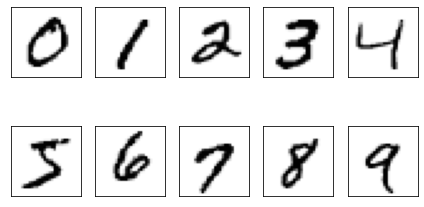

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

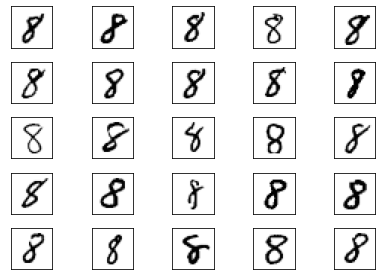

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 8][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [11]:
np.savez_compressed(
    '../mnist/mnist_scaled.npz',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

In [12]:
mnist = np.load('../mnist/mnist_scaled.npz')

In [13]:
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [14]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

In [15]:
from neuralnet import NeuralNetMLP

nn = NeuralNetMLP(
    n_hidden=100,
    l2=0.01,
    epochs=200,
    eta=0.0005,
    minibatch_size=100,
    shuffle=True,
    seed=1
)

In [16]:
nn.fit(
    X_train=X_train[:55000],
    y_train=y_train[:55000],
    X_valid=X_train[55000:],
    y_valid=y_train[55000:]
)

200/200 | Cost: 5065.78 | Train/Valid Acc.: 99.28%/97.98%  

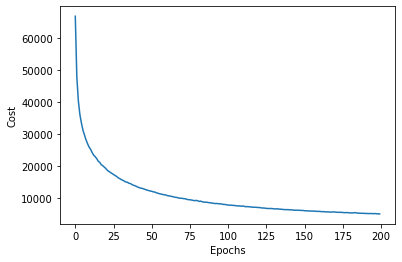

In [17]:
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

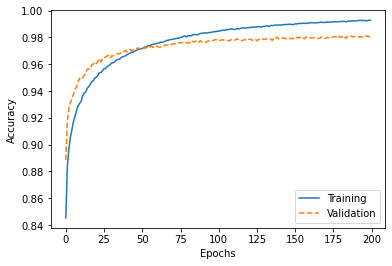

In [18]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='best')
plt.show()

In [20]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print(f'Test accuracy: {acc * 100: .2f}%')

Test accuracy:  97.54%
